In [1]:
#Importing and Initial Analysis and load the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import norm, skew 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression  
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB           
from sklearn.neighbors import KNeighborsClassifier   
from sklearn.svm import SVC                        
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

    
%config InlineBackend.figure_format = 'retina'

# Model Accuracies
ml_accuracies = dict()
# Define colors for each subplot
colors = ['lightcoral', 'brown', 'lightseagreen', 'maroon', 'deeppink', 'darkorange', 
          'royalblue', 'darkviolet', 'gold', 'crimson', 'lightsteelblue', 'salmon', 
          'mediumseagreen', 'olivedrab', 'blue', 'limegreen', 'slateblue', 'red', 
          'steelblue', 'teal', 'peru', 'dimgray', 'violet', 'cyan']



# Load datasets
diabetes_df = pd.read_csv("Healthcare-Diabetes.csv")
heart_attack_df = pd.read_csv("heart_attack_prediction_dataset.csv")


In [2]:

heart_attack_df.rename(columns=str.lower, inplace=True)
heart_attack_df.rename(columns={col: col.replace(" ", "_") for col in heart_attack_df.columns}, inplace=True)

display(heart_attack_df)

print(heart_attack_df.info())


,patient_id,age,sex,cholesterol,blood_pressure,heart_rate,diabetes,family_history,smoking,obesity,...,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,country,continent,hemisphere,heart_attack_risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   patient_id                       8763 non-null   object 
 1   age                              8763 non-null   int64  
 2   sex                              8763 non-null   object 
 3   cholesterol                      8763 non-null   int64  
 4   blood_pressure                   8763 non-null   object 
 5   heart_rate                       8763 non-null   int64  
 6   diabetes                         8763 non-null   int64  
 7   family_history                   8763 non-null   int64  
 8   smoking                          8763 non-null   int64  
 9   obesity                          8763 non-null   int64  
 10  alcohol_consumption              8763 non-null   int64  
 11  exercise_hours_per_week          8763 non-null   float64
 12  diet                

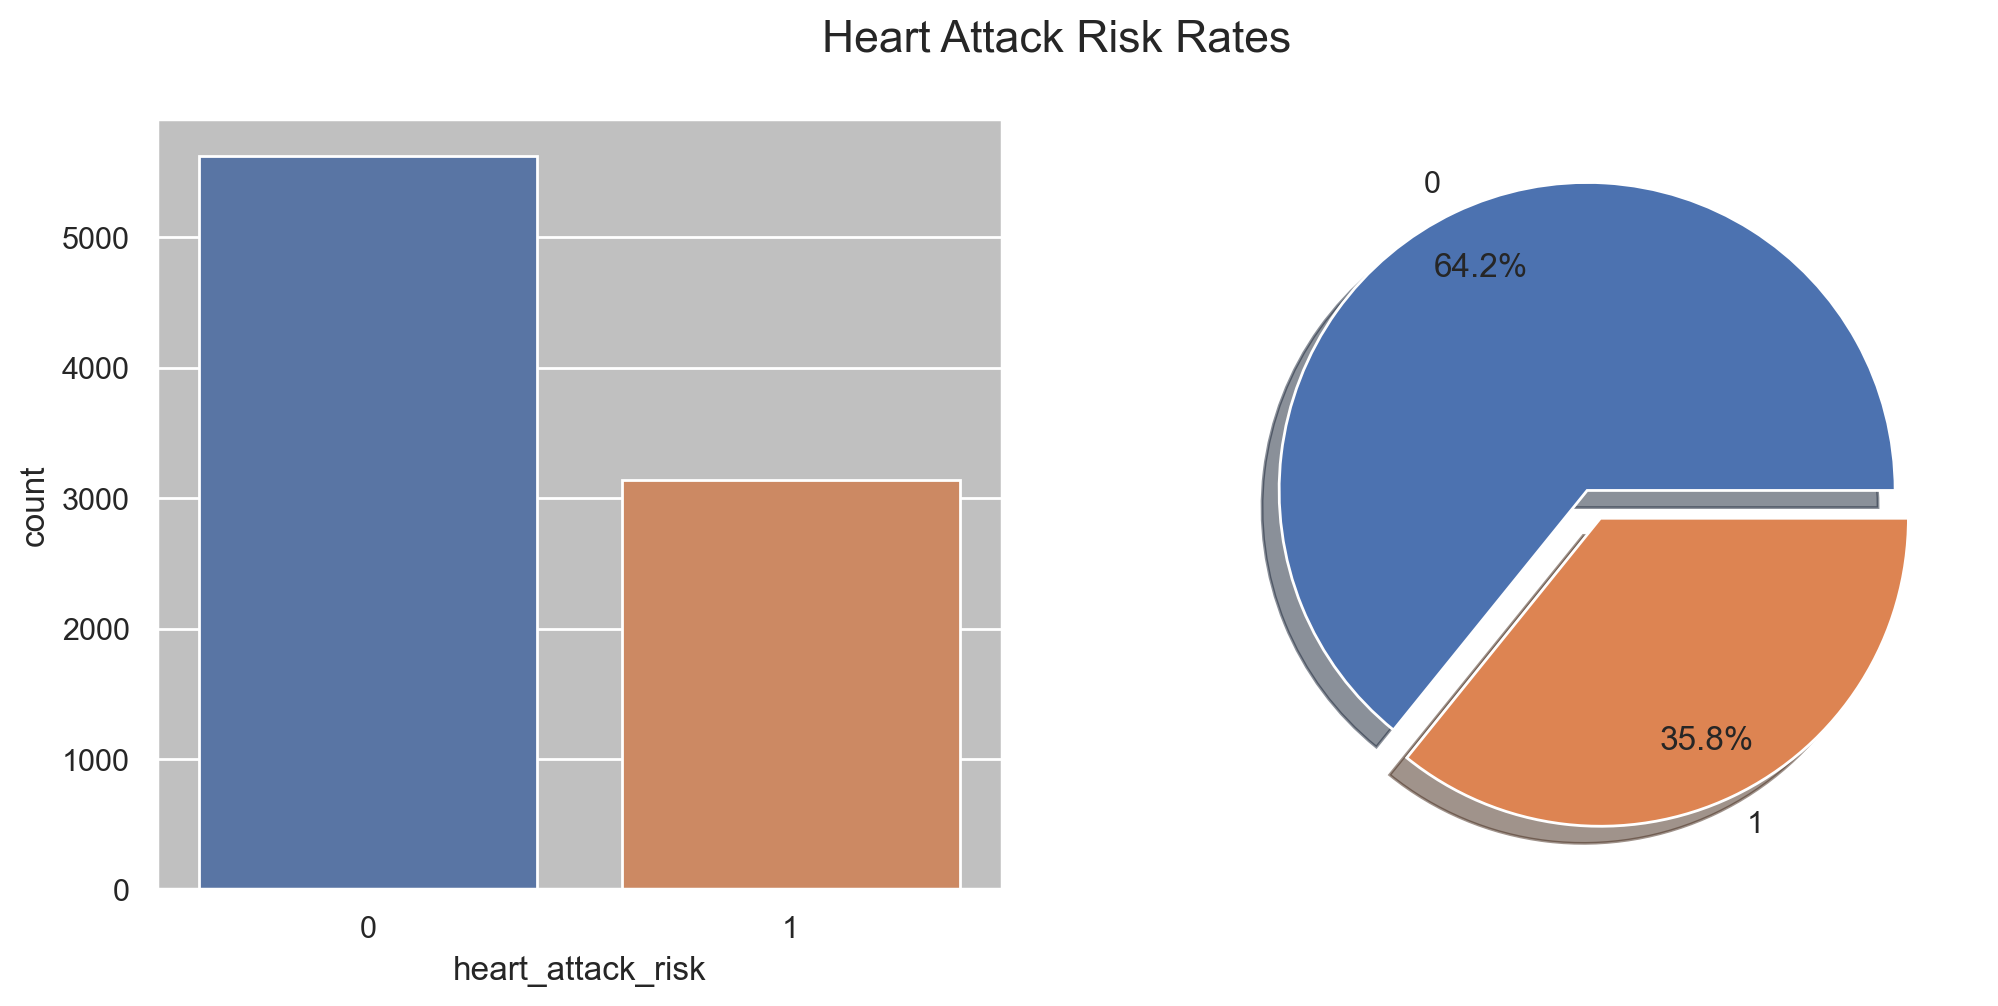

In [3]:
plt.figure(figsize=(12,5))
sns.set(rc={'axes.facecolor':'c0c0c0', 'figure.facecolor':'lightblue'})
plt.subplot(1, 2, 1)
sns.barplot(x=heart_attack_df["heart_attack_risk"].value_counts().index, y=heart_attack_df["heart_attack_risk"].value_counts())
plt.subplot(1, 2, 2)
plt.pie(x=heart_attack_df["heart_attack_risk"].value_counts(), autopct="%.1f%%", pctdistance=0.8,
        labels= heart_attack_df["heart_attack_risk"].value_counts().index, shadow=True, explode=[0.05,0.05])
plt.suptitle("Heart Attack Risk Rates", fontsize=16)
plt.show()

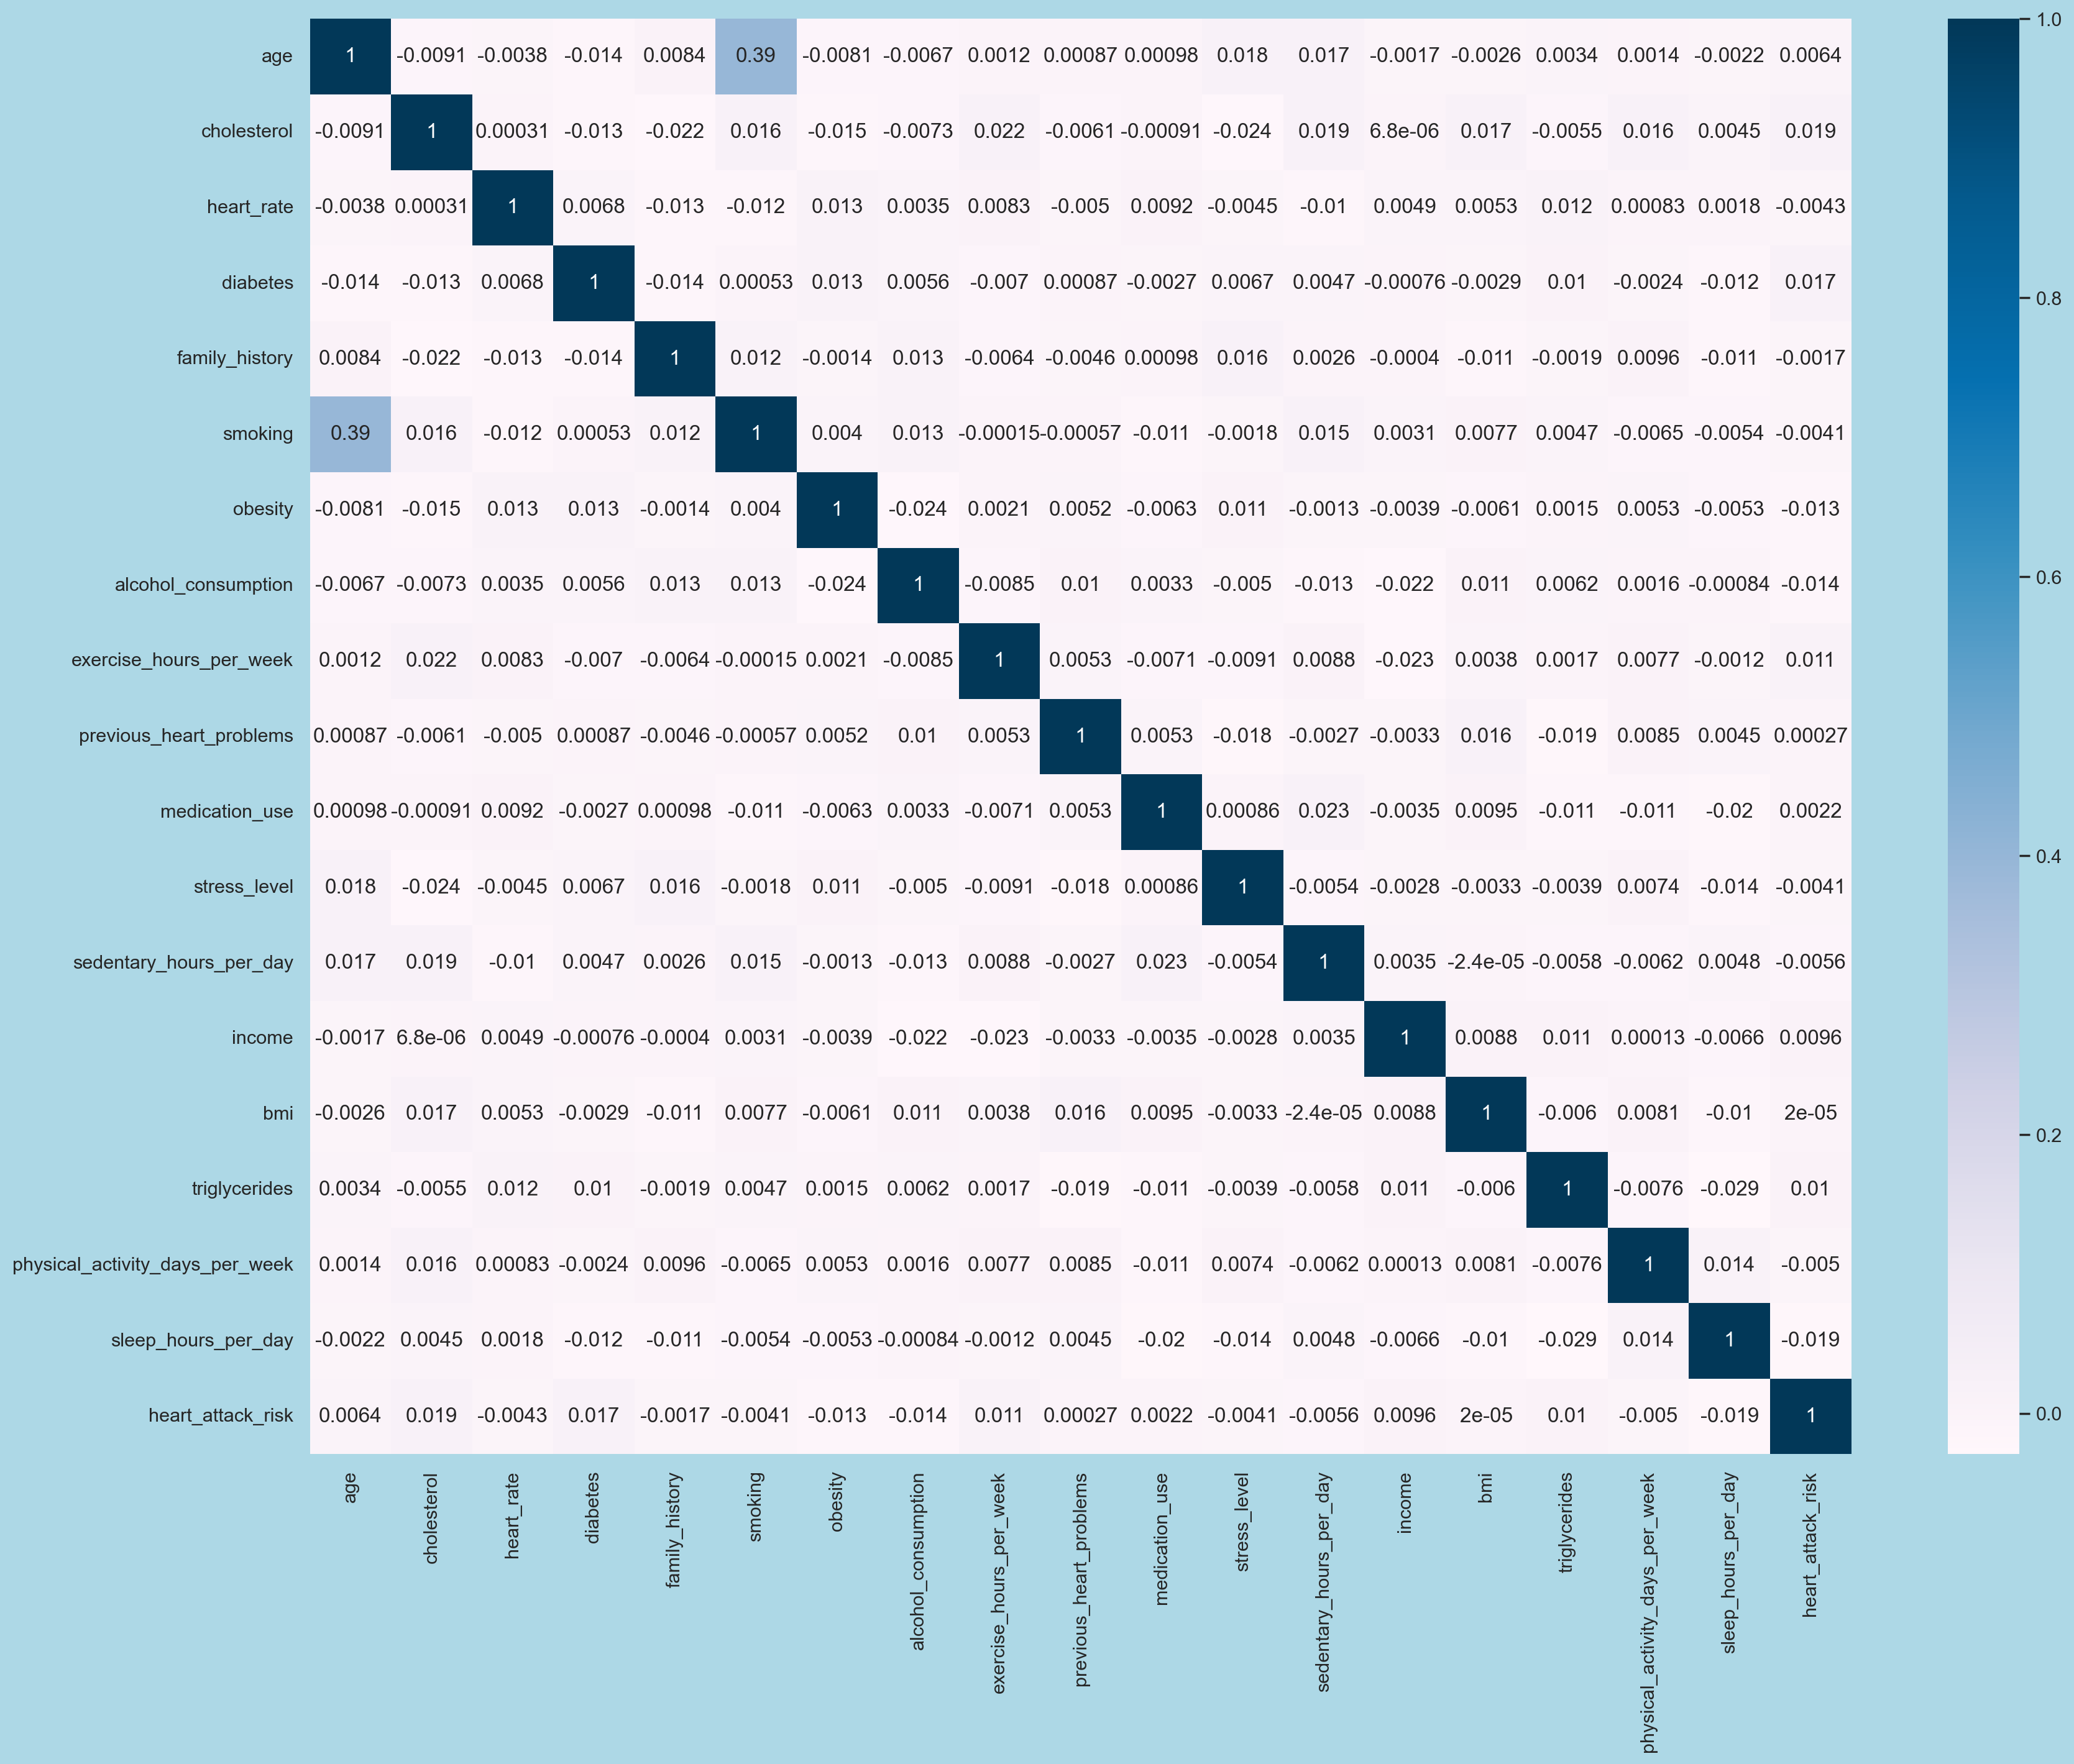

In [4]:
numeric_heart_attack_df = heart_attack_df.select_dtypes(include=['number'])

# Create the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(numeric_heart_attack_df.corr(), annot=True, cmap=plt.cm.PuBu)
plt.show()

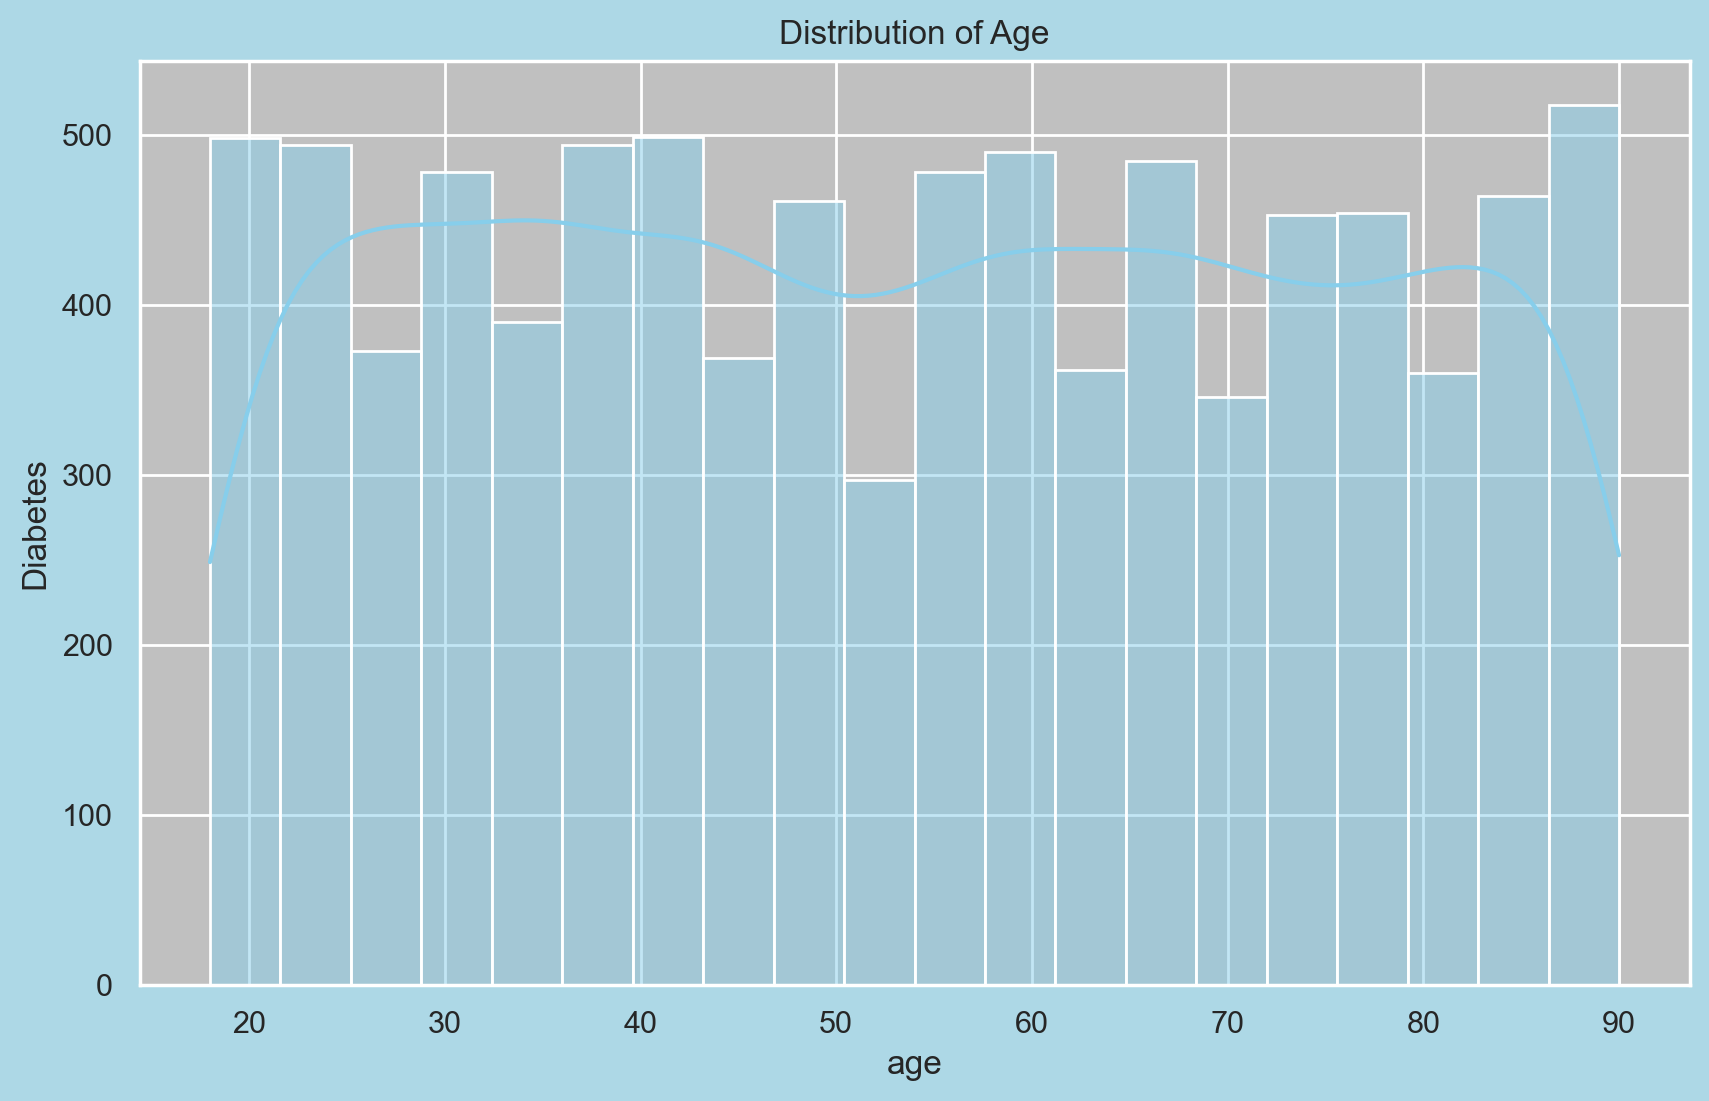

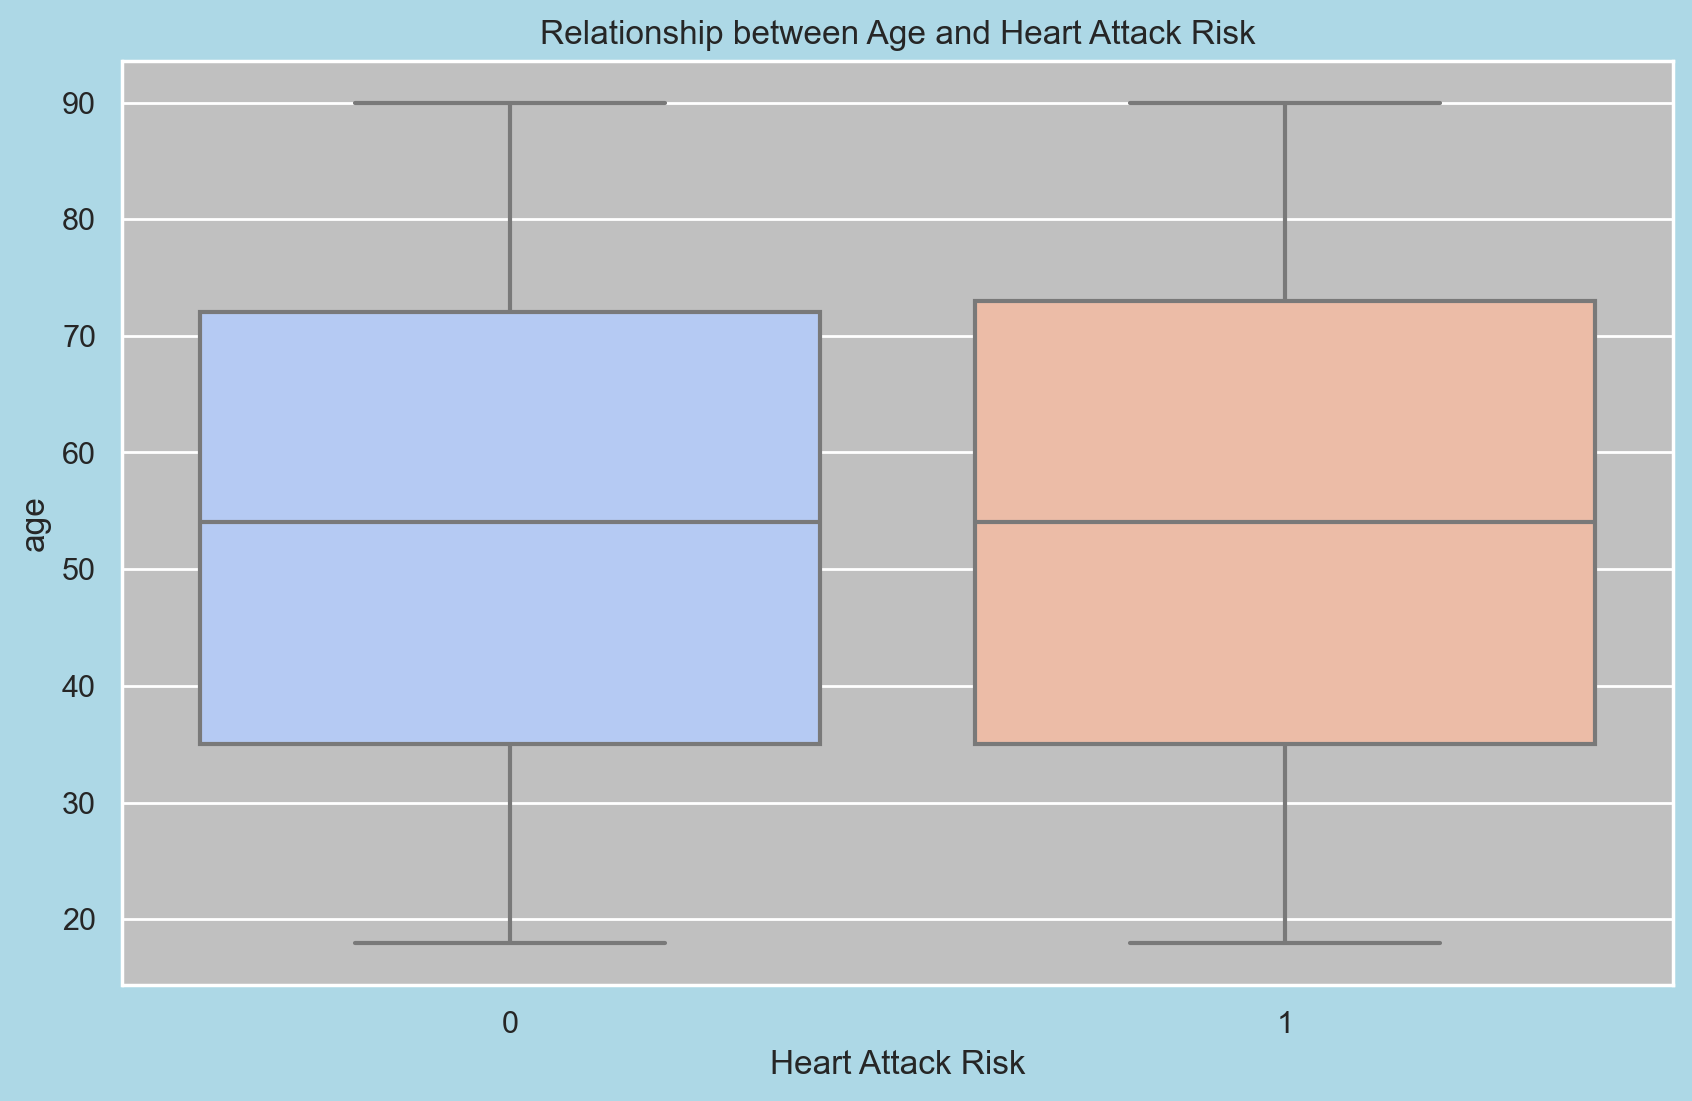

In [5]:
#univariate Analysis
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(heart_attack_df['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('age')
plt.ylabel('Diabetes')
plt.show()


# Bivariate Analysis
# Relationship between Age and Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='heart_attack_risk', y='age', data=heart_attack_df, palette='coolwarm')
plt.title('Relationship between Age and Heart Attack Risk')
plt.xlabel('Heart Attack Risk')
plt.ylabel('age')
plt.show()




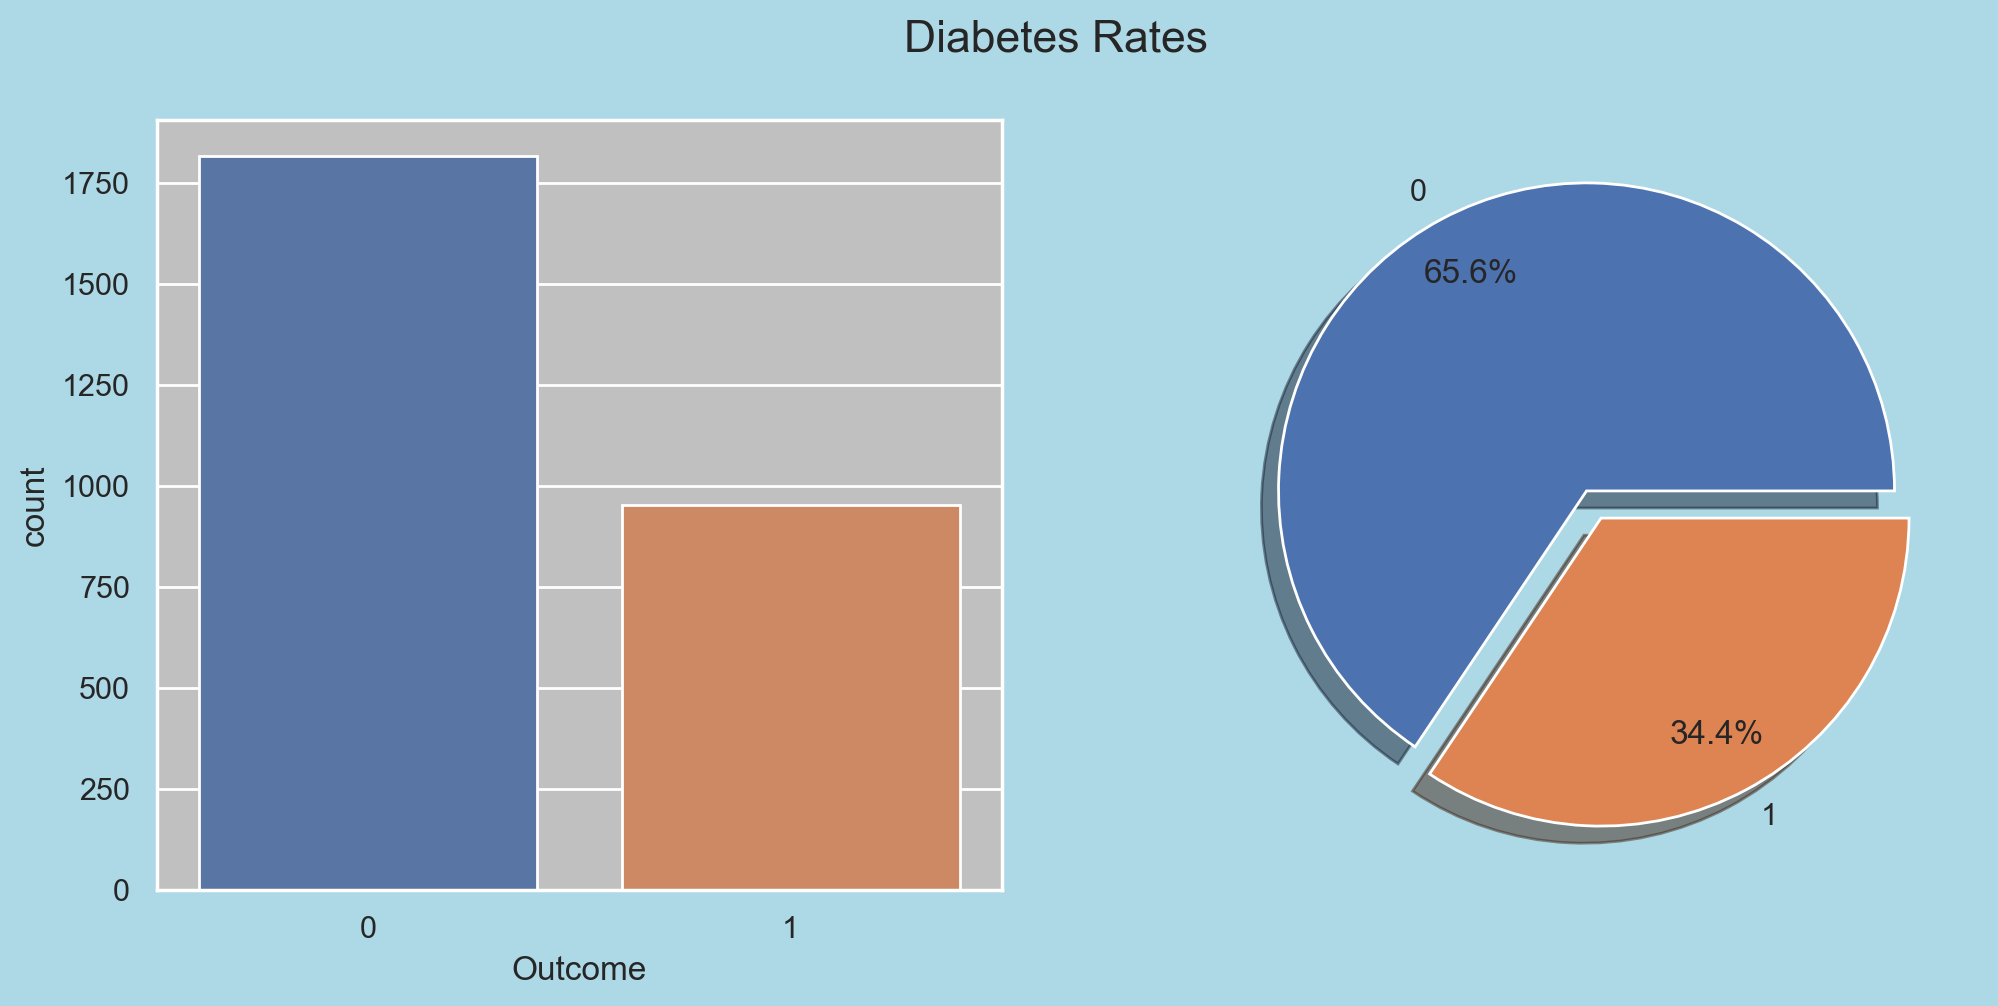

In [7]:
plt.figure(figsize=(12,5))
sns.set(rc={'axes.facecolor':'c0c0c0', 'figure.facecolor':'lightblue'})
plt.subplot(1, 2, 1)
sns.barplot(x=diabetes_df["Outcome"].value_counts().index, y=diabetes_df["Outcome"].value_counts())
plt.subplot(1, 2, 2)
plt.pie(x=diabetes_df["Outcome"].value_counts(), autopct="%.1f%%", pctdistance=0.8,
        labels= diabetes_df["Outcome"].value_counts().index, shadow=True, explode=[0.05,0.05])
plt.suptitle("Diabetes Rates", fontsize=16)
plt.show()

In [8]:

diabetes_df.rename(columns=str.lower, inplace=True)
diabetes_df.rename(columns={col: col.replace(" ", "_") for col in diabetes_df.columns}, inplace=True)

display(diabetes_df)

print(diabetes_df.info())


,id,pregnancies,glucose,blood_pressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        2768 non-null   int64  
 1   pregnancies               2768 non-null   int64  
 2   glucose                   2768 non-null   int64  
 3   blood_pressure            2768 non-null   int64  
 4   skinthickness             2768 non-null   int64  
 5   insulin                   2768 non-null   int64  
 6   bmi                       2768 non-null   float64
 7   diabetespedigreefunction  2768 non-null   float64
 8   age                       2768 non-null   int64  
 9   outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB
None


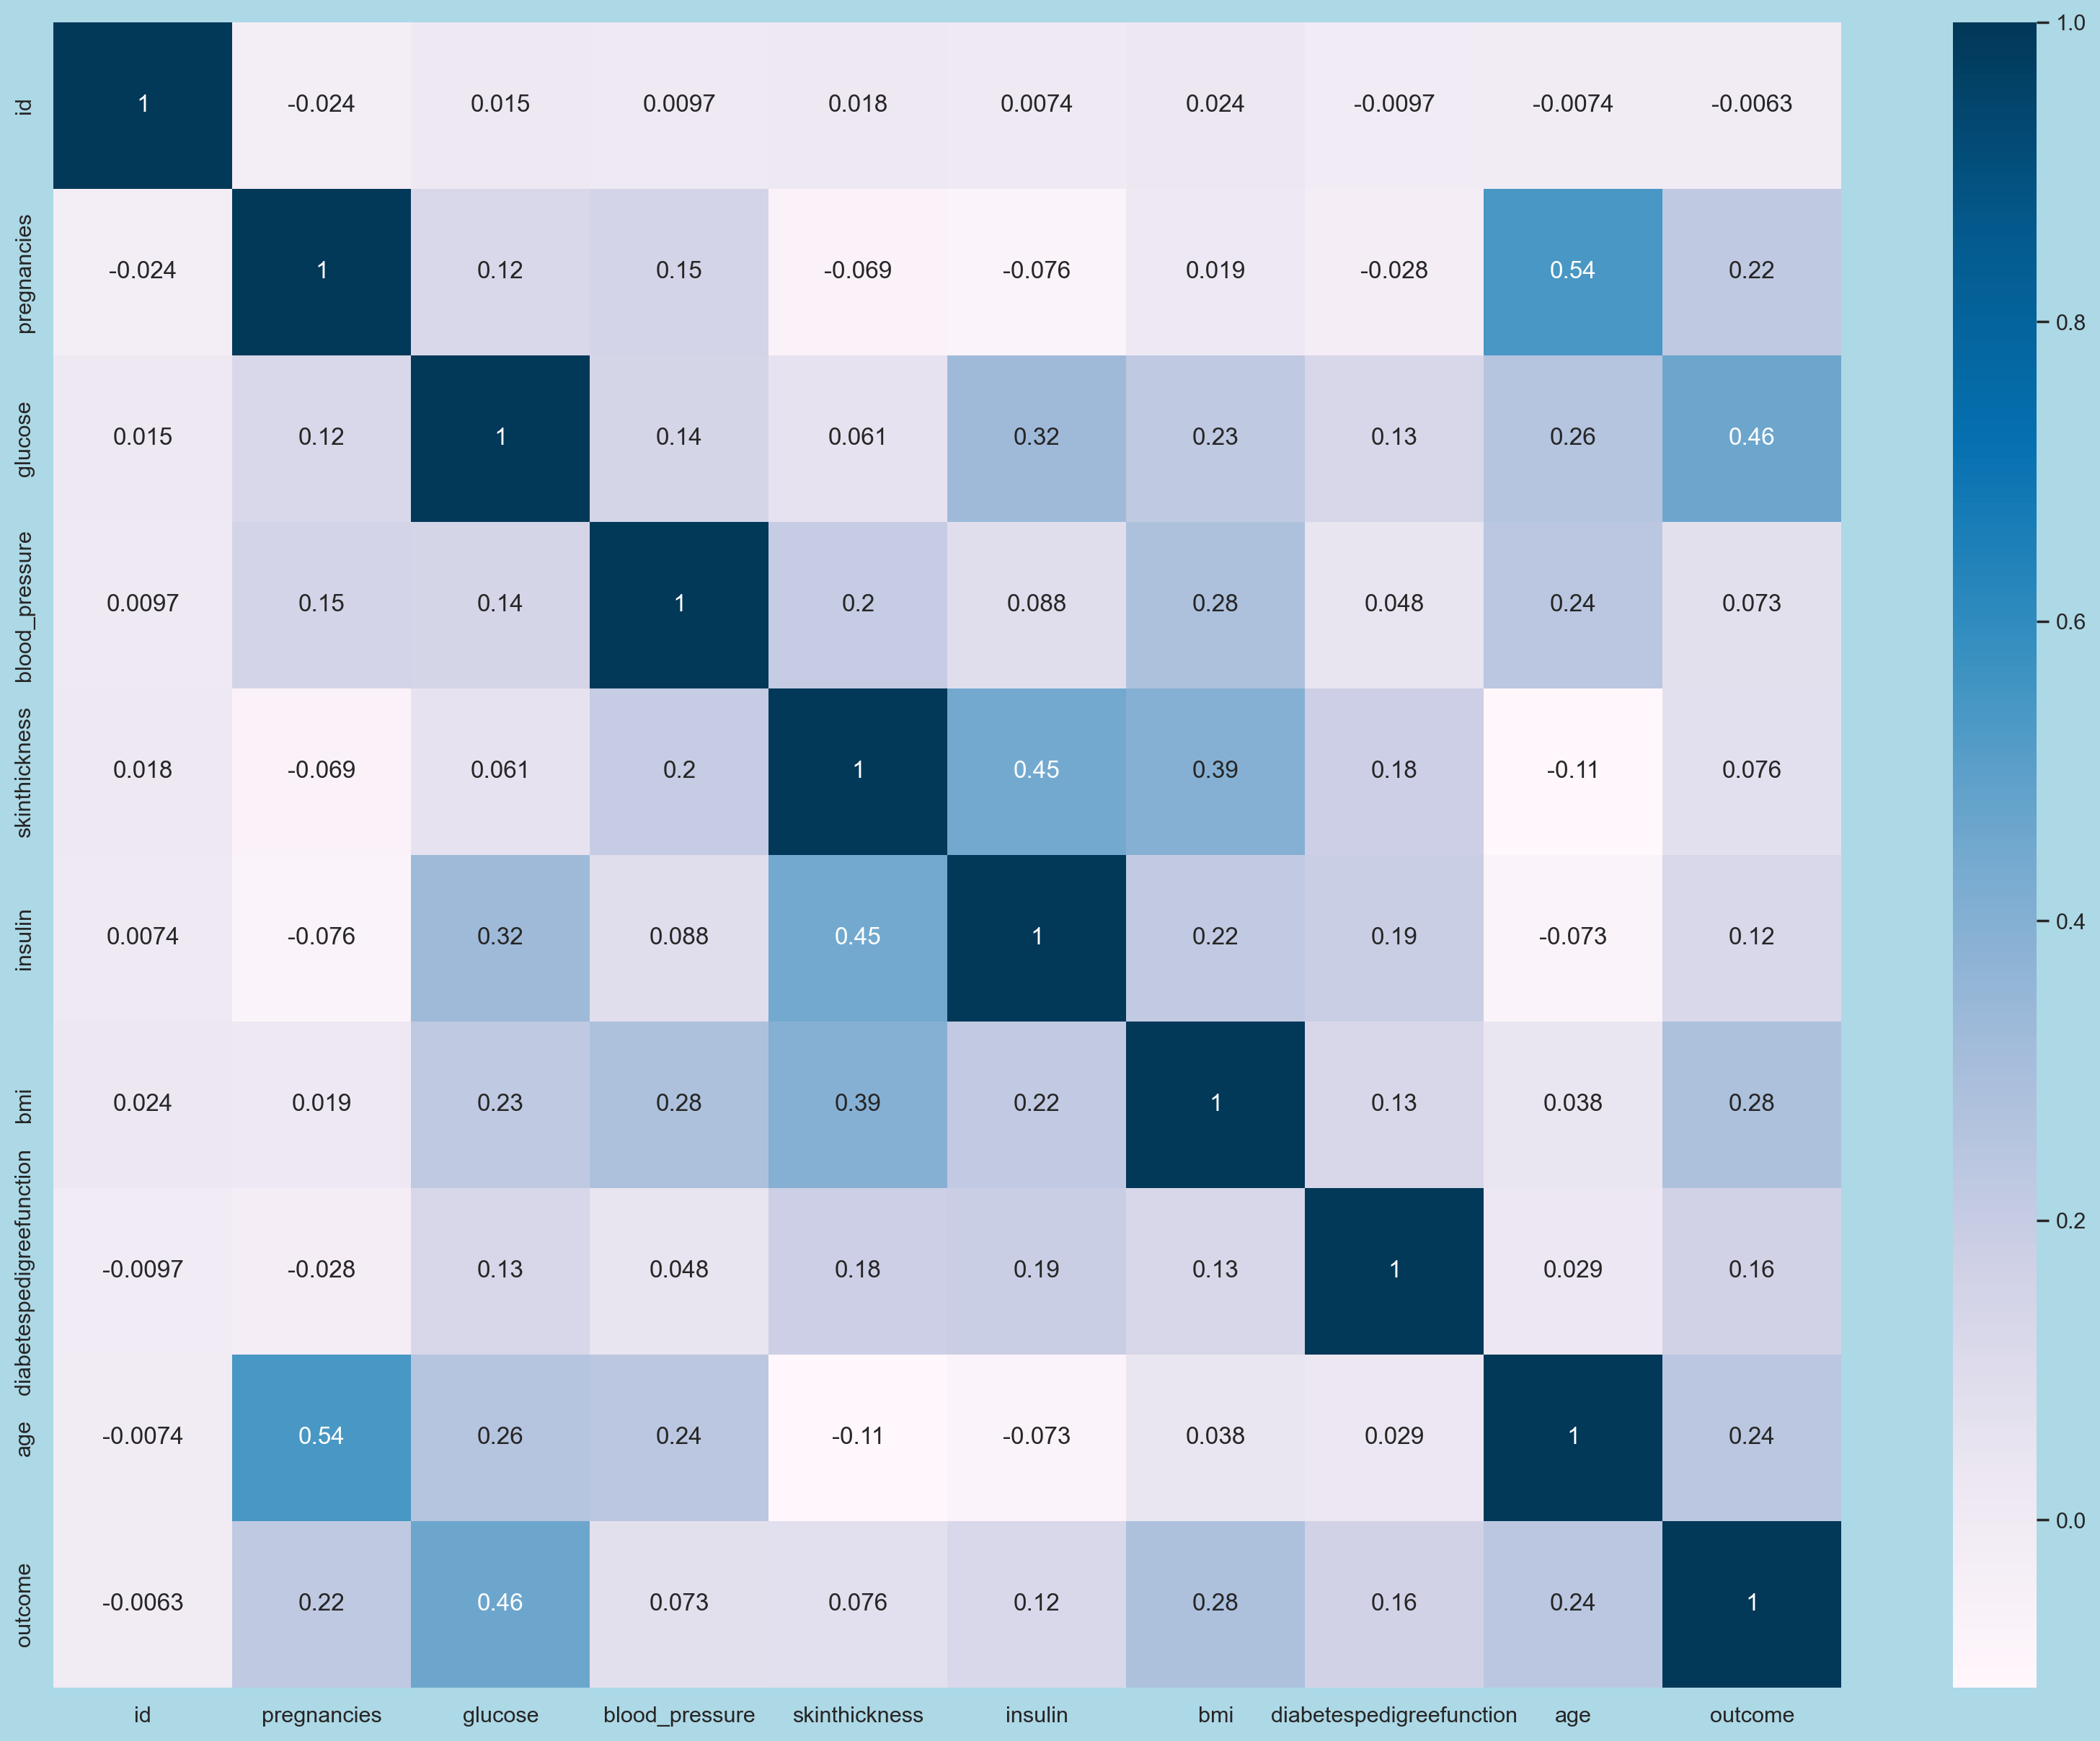

In [9]:
numeric_diabetes_df = diabetes_df.select_dtypes(include=['number'])

# Create the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(numeric_diabetes_df.corr(), annot=True, cmap=plt.cm.PuBu)
plt.show()

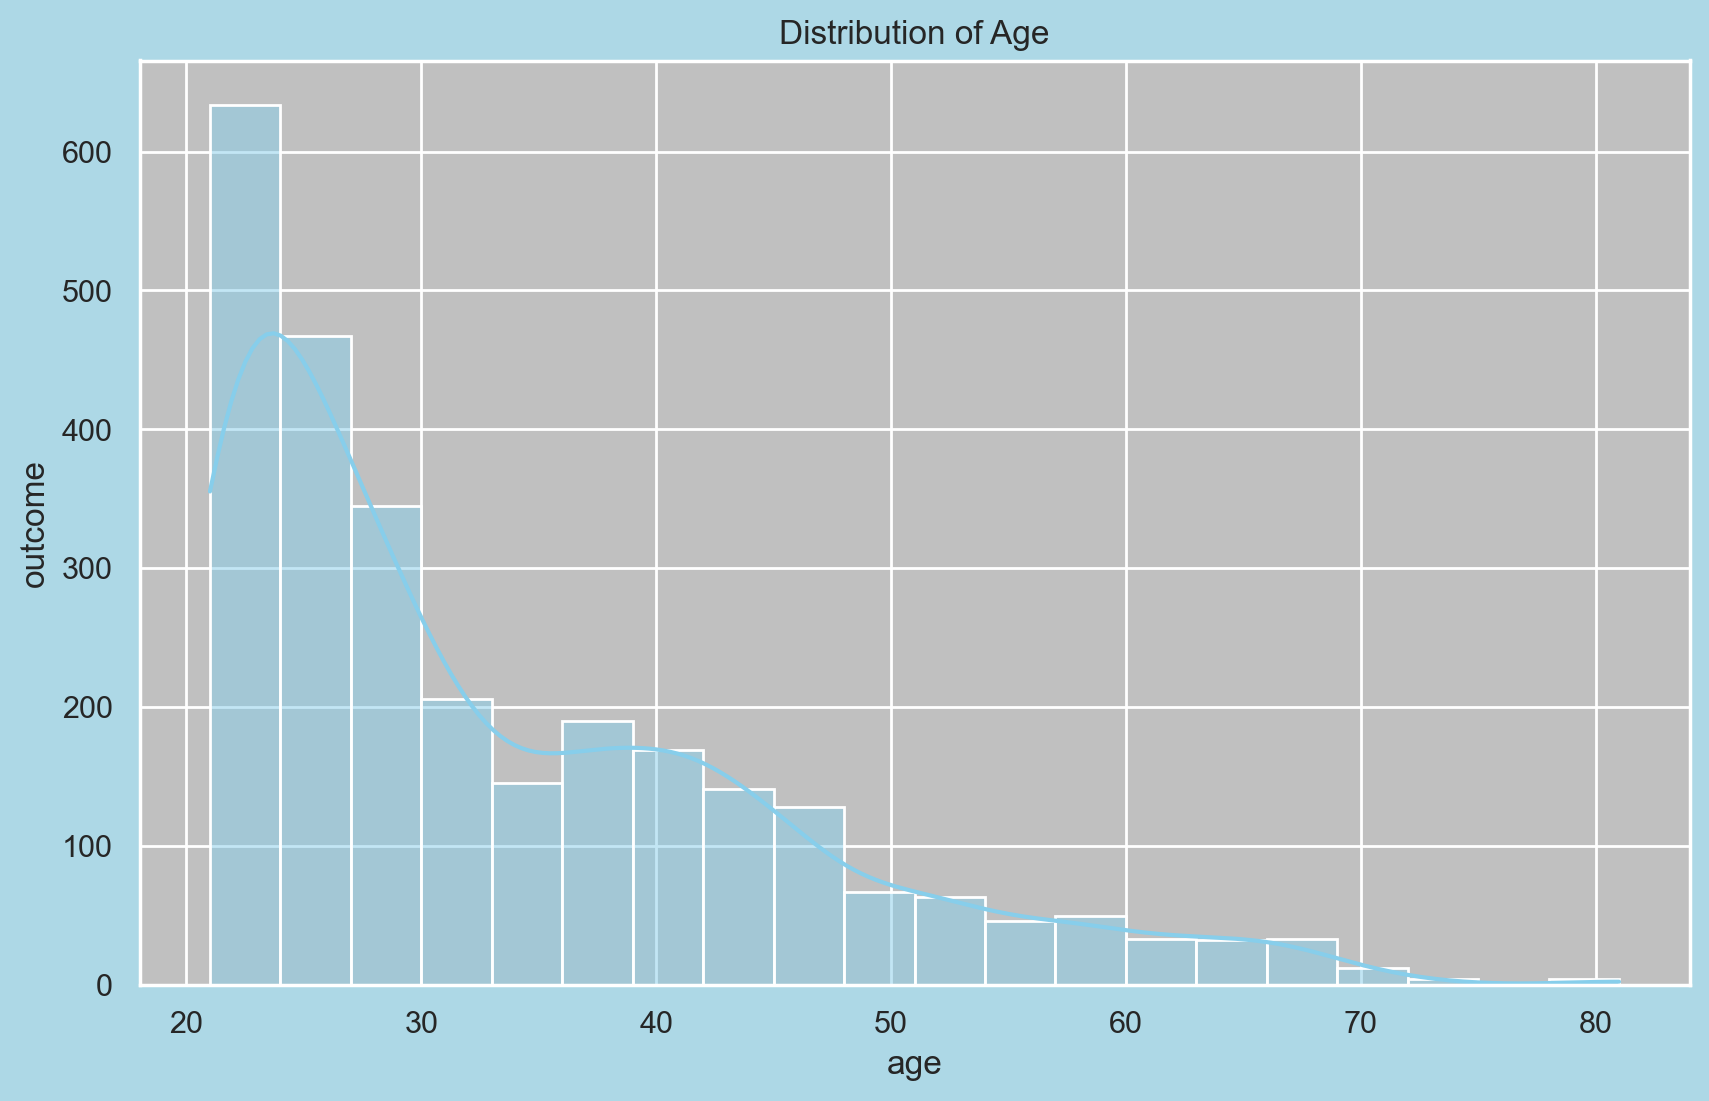

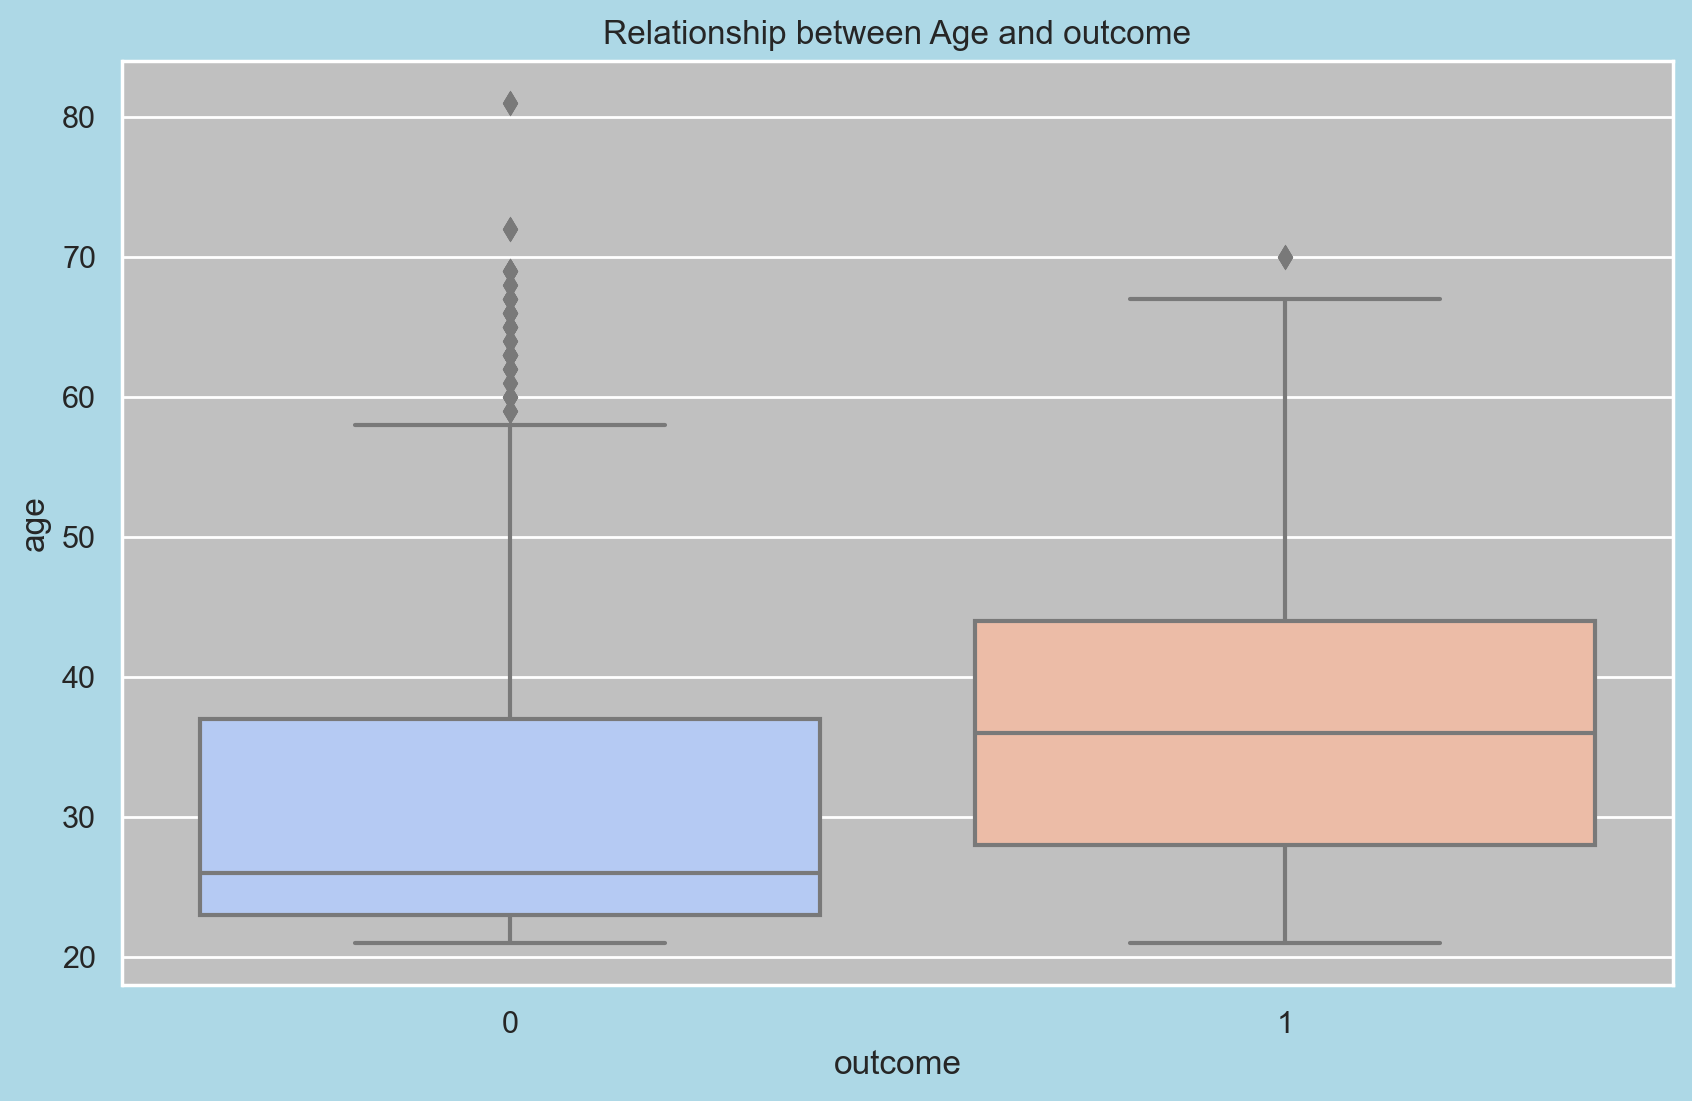

In [10]:
#univariate Analysis
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(diabetes_df['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('age')
plt.ylabel('outcome')
plt.show()


# Bivariate Analysis
# Relationship between Age and Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='outcome', y='age', data=diabetes_df, palette='coolwarm')
plt.title('Relationship between Age and outcome')
plt.xlabel('outcome')
plt.ylabel('age')
plt.show()




Health Risk Ensemble (Voting Classifier) Model Accuracy: 0.9278376990241397
Health Risk Ensemble (Voting Classifier) Model Classification Report:
               precision    recall  f1-score   support

        Both       0.91      0.90      0.91       606
    Diabetes       0.93      0.93      0.93      1165
Heart Attack       0.93      0.92      0.92       749
        None       0.94      0.94      0.94      1374

    accuracy                           0.93      3894
   macro avg       0.93      0.92      0.92      3894
weighted avg       0.93      0.93      0.93      3894


Health Risk Model Cross-Validated Scores: [0.89855538 0.90529695 0.90369181 0.88860353 0.90622993]
Health Risk Model Mean Cross-Validated Score: 0.9004755203806967


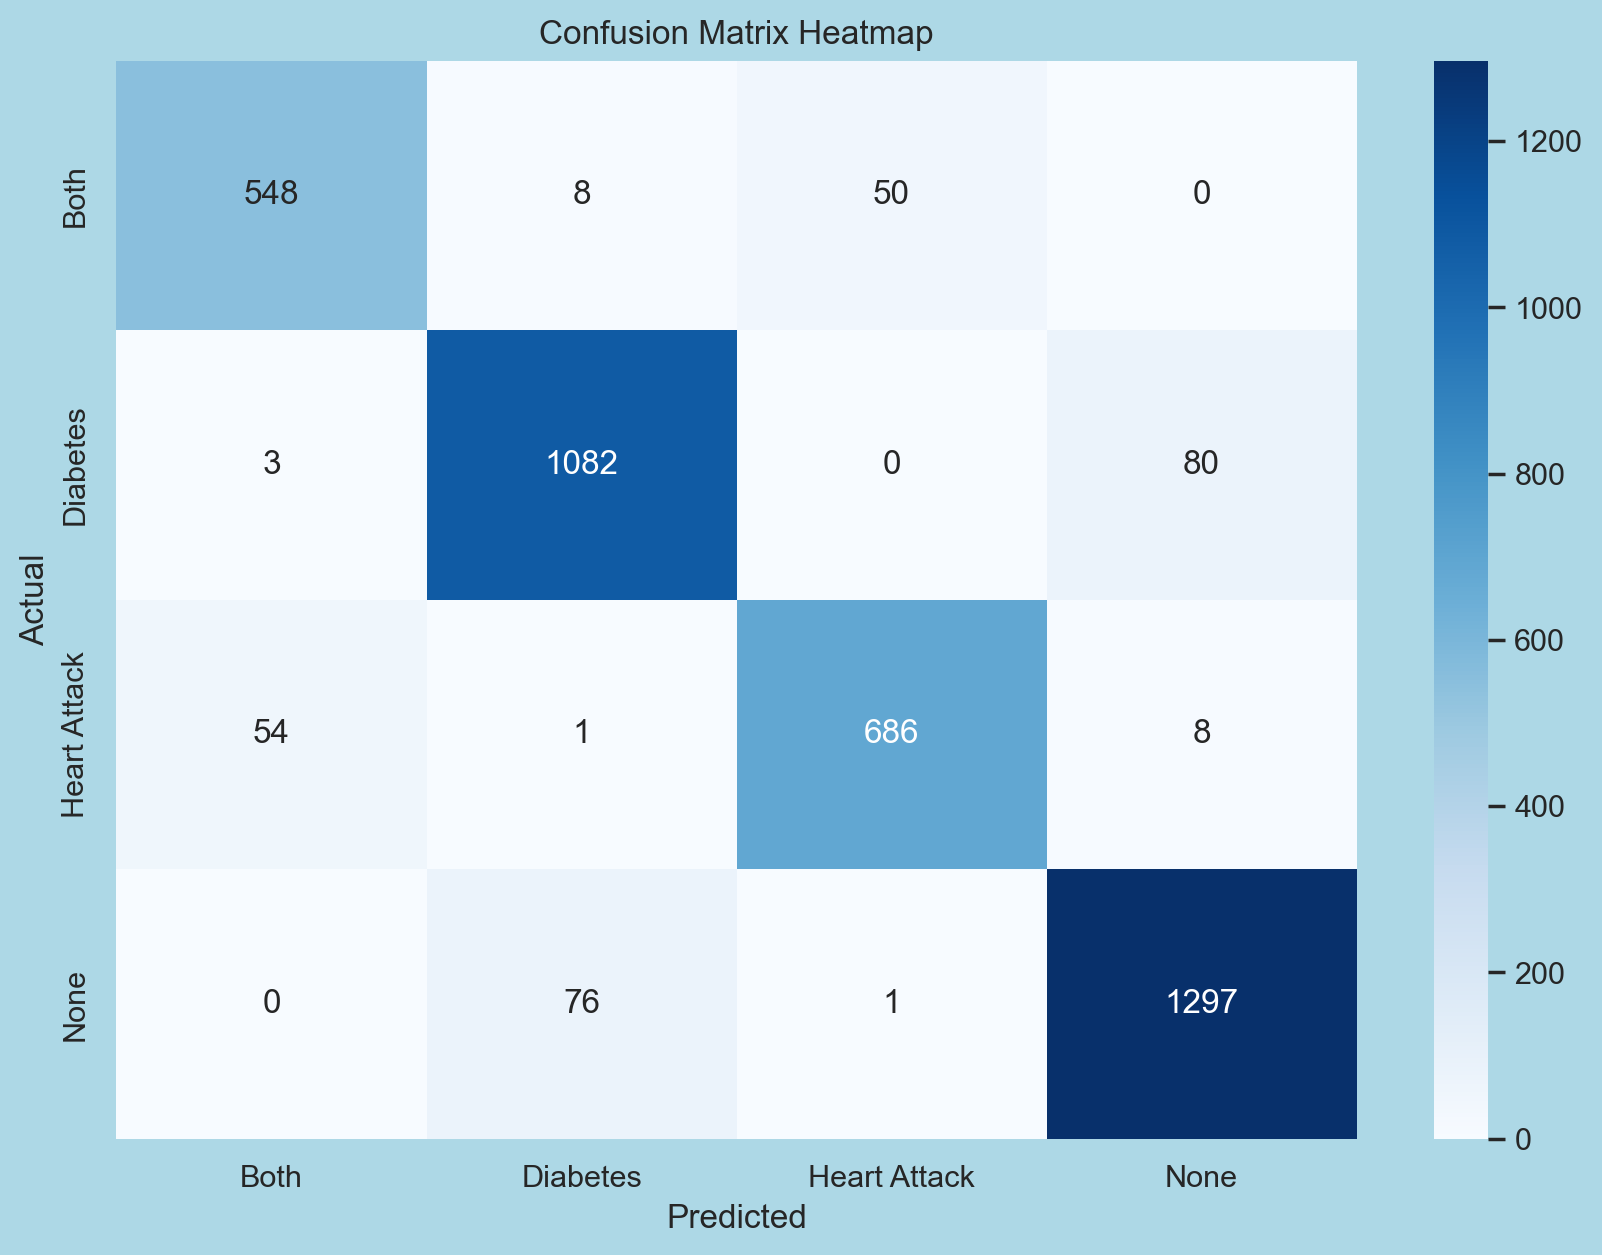

In [11]:
#Train a K-Nearest Neighbors (KNN) model and a Voting Classifier ensemble.

# Preprocess 'Blood Pressure' column in heart attack dataset to extract systolic and diastolic values
heart_attack_df[['Systolic BP', 'Diastolic BP']] = heart_attack_df['blood_pressure'].str.split('/', expand=True)
heart_attack_df['Systolic BP'] = heart_attack_df['Systolic BP'].astype(float)
heart_attack_df['Diastolic BP'] = heart_attack_df['Diastolic BP'].astype(float)

# Merge datasets based on 'Blood Pressure' column
merged_df = pd.merge(diabetes_df, heart_attack_df, left_on='blood_pressure', right_on='Systolic BP', how='inner')

# Check if the merged dataframe is empty
if merged_df.empty:
    print("Merged dataframe is empty. Please ensure that 'Blood Pressure' is a meaningful common column.")
else:
    # Create a unified target variable
    merged_df['Health Risk'] = merged_df.apply(
        lambda row: 'Both' if row['outcome'] == 1 and row['heart_attack_risk'] == 1 else
                    ('Diabetes' if row['outcome'] == 1 else
                     ('Heart Attack' if row['heart_attack_risk'] == 1 else 'None')), axis=1)

    # Identify non-numeric columns in heart attack dataset
    non_numeric_cols = merged_df.select_dtypes(exclude=['float64', 'int64']).columns

    # Exclude non-numeric columns and target columns from features
    feature_cols = [col for col in merged_df.columns if col not in non_numeric_cols and col not in ['Outcome', 'Heart Attack Risk', 'Health Risk']]

    # Split merged dataset into features (X) and target (y)
    X = merged_df[feature_cols]
    y = merged_df['Health Risk']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Build and train KNN model
    knn_model = KNeighborsClassifier()
    knn_model.fit(X_train_scaled, y_train)

    # Build Voting Classifier ensemble
    ensemble_model = VotingClassifier(estimators=[
        ('knn', knn_model)
    ], voting='hard')

    # Train Voting Classifier ensemble
    ensemble_model.fit(X_train_scaled, y_train)

    # Predictions
    ensemble_predictions = ensemble_model.predict(X_test_scaled)

    # Evaluation
    accuracy = accuracy_score(y_test, ensemble_predictions)
    print("Health Risk Ensemble (Voting Classifier) Model Accuracy:", accuracy)
    print("Health Risk Ensemble (Voting Classifier) Model Classification Report:\n", classification_report(y_test, ensemble_predictions))

    # Cross-validated scores
    cv_scores = cross_val_score(ensemble_model, X_train_scaled, y_train, cv=5)
    print("\nHealth Risk Model Cross-Validated Scores:", cv_scores)
    print("Health Risk Model Mean Cross-Validated Score:", cv_scores.mean())

     # Confusion Matrix
    confusion_matrix_result = confusion_matrix(y_test, ensemble_predictions)
    

    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues', xticklabels=ensemble_model.classes_, yticklabels=ensemble_model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

Health Risk SVM Model Accuracy: 1.0
Health Risk SVM Model Classification Report:
               precision    recall  f1-score   support

        Both       1.00      1.00      1.00       603
    Diabetes       1.00      1.00      1.00      1303
Heart Attack       1.00      1.00      1.00       690
        None       1.00      1.00      1.00      1298

    accuracy                           1.00      3894
   macro avg       1.00      1.00      1.00      3894
weighted avg       1.00      1.00      1.00      3894


Health Risk SVM Model Cross-Validated Scores: [1. 1. 1. 1. 1.]
Health Risk SVM Model Mean Cross-Validated Score: 1.0


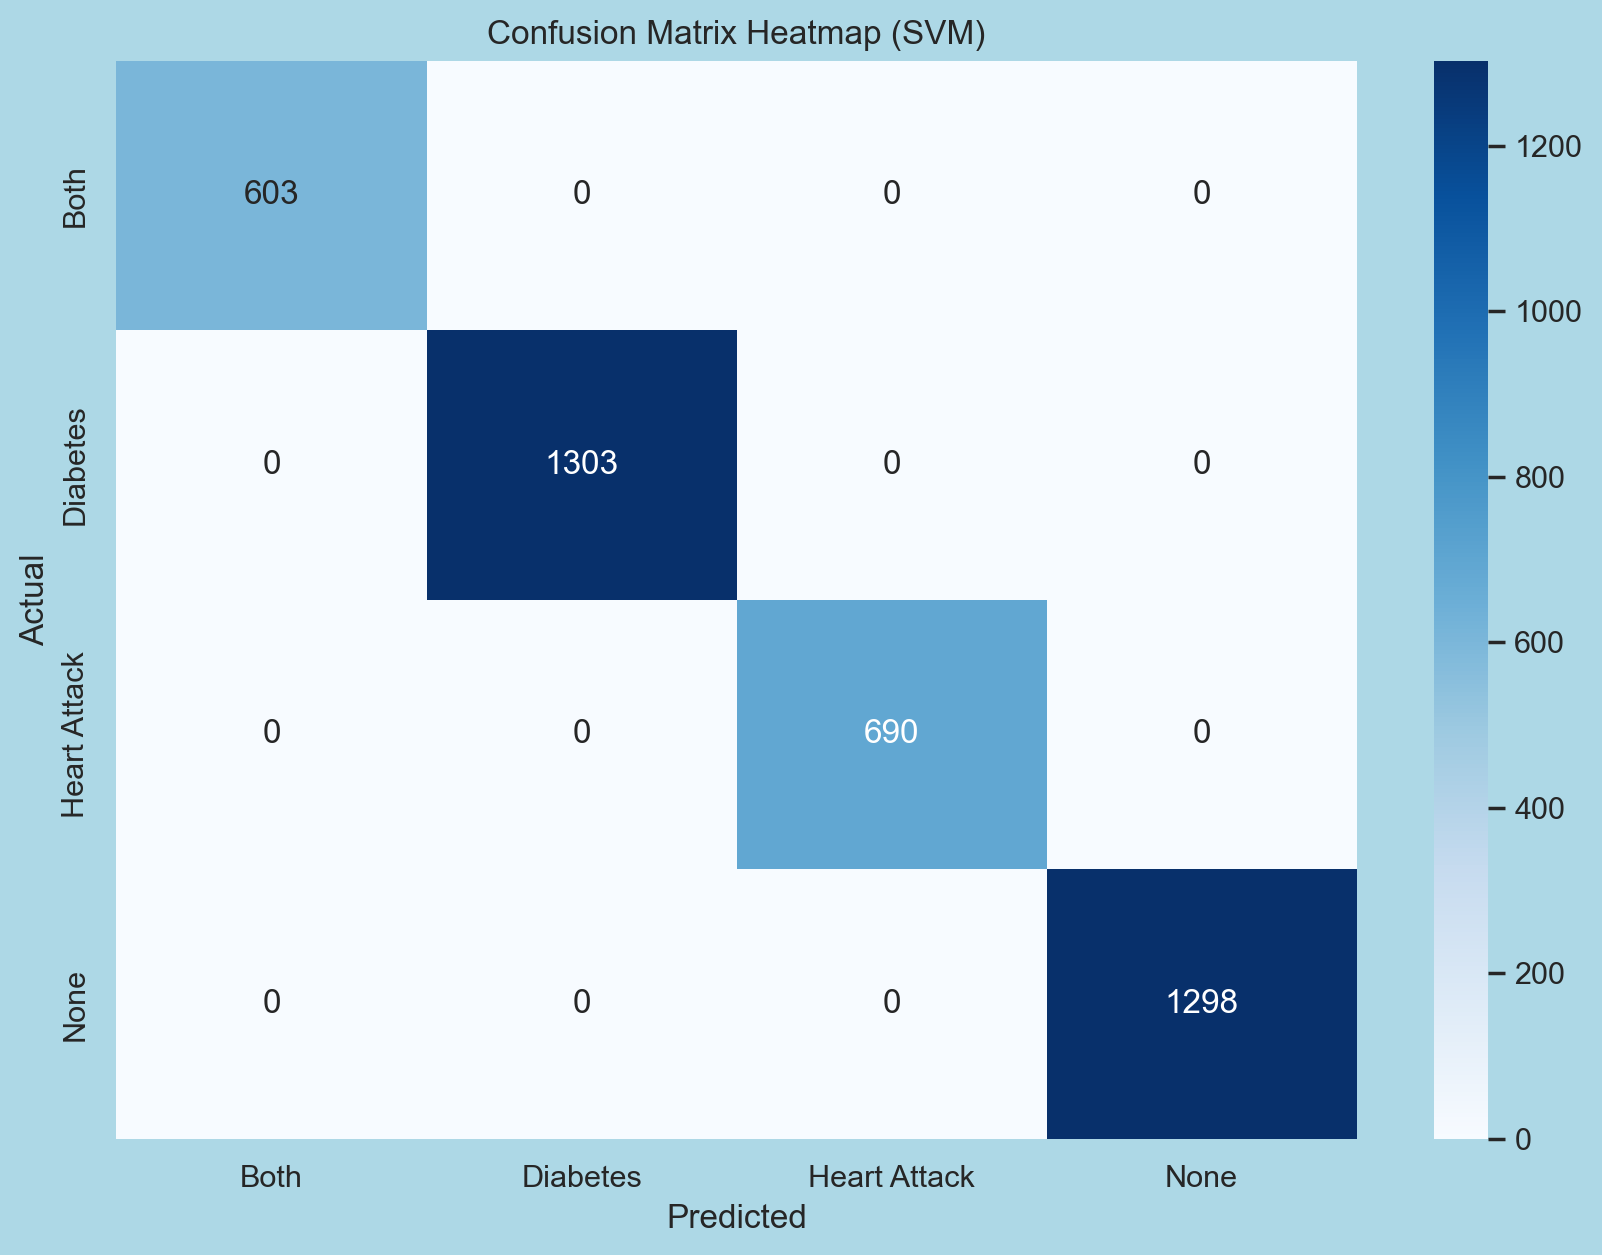

In [12]:
#SVM Model

# Preprocess 'Blood Pressure' column
heart_attack_df[['Systolic BP', 'Diastolic BP']] = heart_attack_df['blood_pressure'].str.split('/', expand=True)
heart_attack_df['Systolic BP'] = heart_attack_df['Systolic BP'].astype(float)
heart_attack_df['Diastolic BP'] = heart_attack_df['Diastolic BP'].astype(float)

# Merge datasets based on 'Blood Pressure' column
merged_df = pd.merge(diabetes_df, heart_attack_df, left_on='blood_pressure', right_on='Systolic BP', how='inner')

# Create target variable 'Health Risk'
merged_df['Health Risk'] = merged_df.apply(
    lambda row: 'Both' if row['outcome'] == 1 and row['heart_attack_risk'] == 1 else
                ('Diabetes' if row['outcome'] == 1 else
                 ('Heart Attack' if row['heart_attack_risk'] == 1 else 'None')), axis=1)

# Prepare features and target variable
non_numeric_cols = merged_df.select_dtypes(exclude=['float64', 'int64']).columns
feature_cols = [col for col in merged_df.columns if col not in non_numeric_cols and col not in ['Outcome', 'Heart Attack Risk', 'Health Risk']]
X = merged_df[feature_cols]
y = merged_df['Health Risk']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predictions
svm_predictions = svm_model.predict(X_test_scaled)

# Evaluation
accuracy = accuracy_score(y_test, svm_predictions)
print("Health Risk SVM Model Accuracy:", accuracy)
print("Health Risk SVM Model Classification Report:\n", classification_report(y_test, svm_predictions))

# Cross-validated scores
cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)
print("\nHealth Risk SVM Model Cross-Validated Scores:", cv_scores)
print("Health Risk SVM Model Mean Cross-Validated Score:", cv_scores.mean())

# Confusion Matrix
confusion_matrix_result = confusion_matrix(y_test, svm_predictions)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap (SVM)')
plt.show()


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Hyperparameters for KNN: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
Classification Report for the Best KNN Model:
              precision    recall  f1-score   support

        Both       0.95      0.95      0.95       603
    Diabetes       0.97      0.93      0.95      1303
Heart Attack       0.96      0.96      0.96       690
        None       0.94      0.98      0.96      1298

    accuracy                           0.96      3894
   macro avg       0.95      0.96      0.95      3894
weighted avg       0.96      0.96      0.96      3894



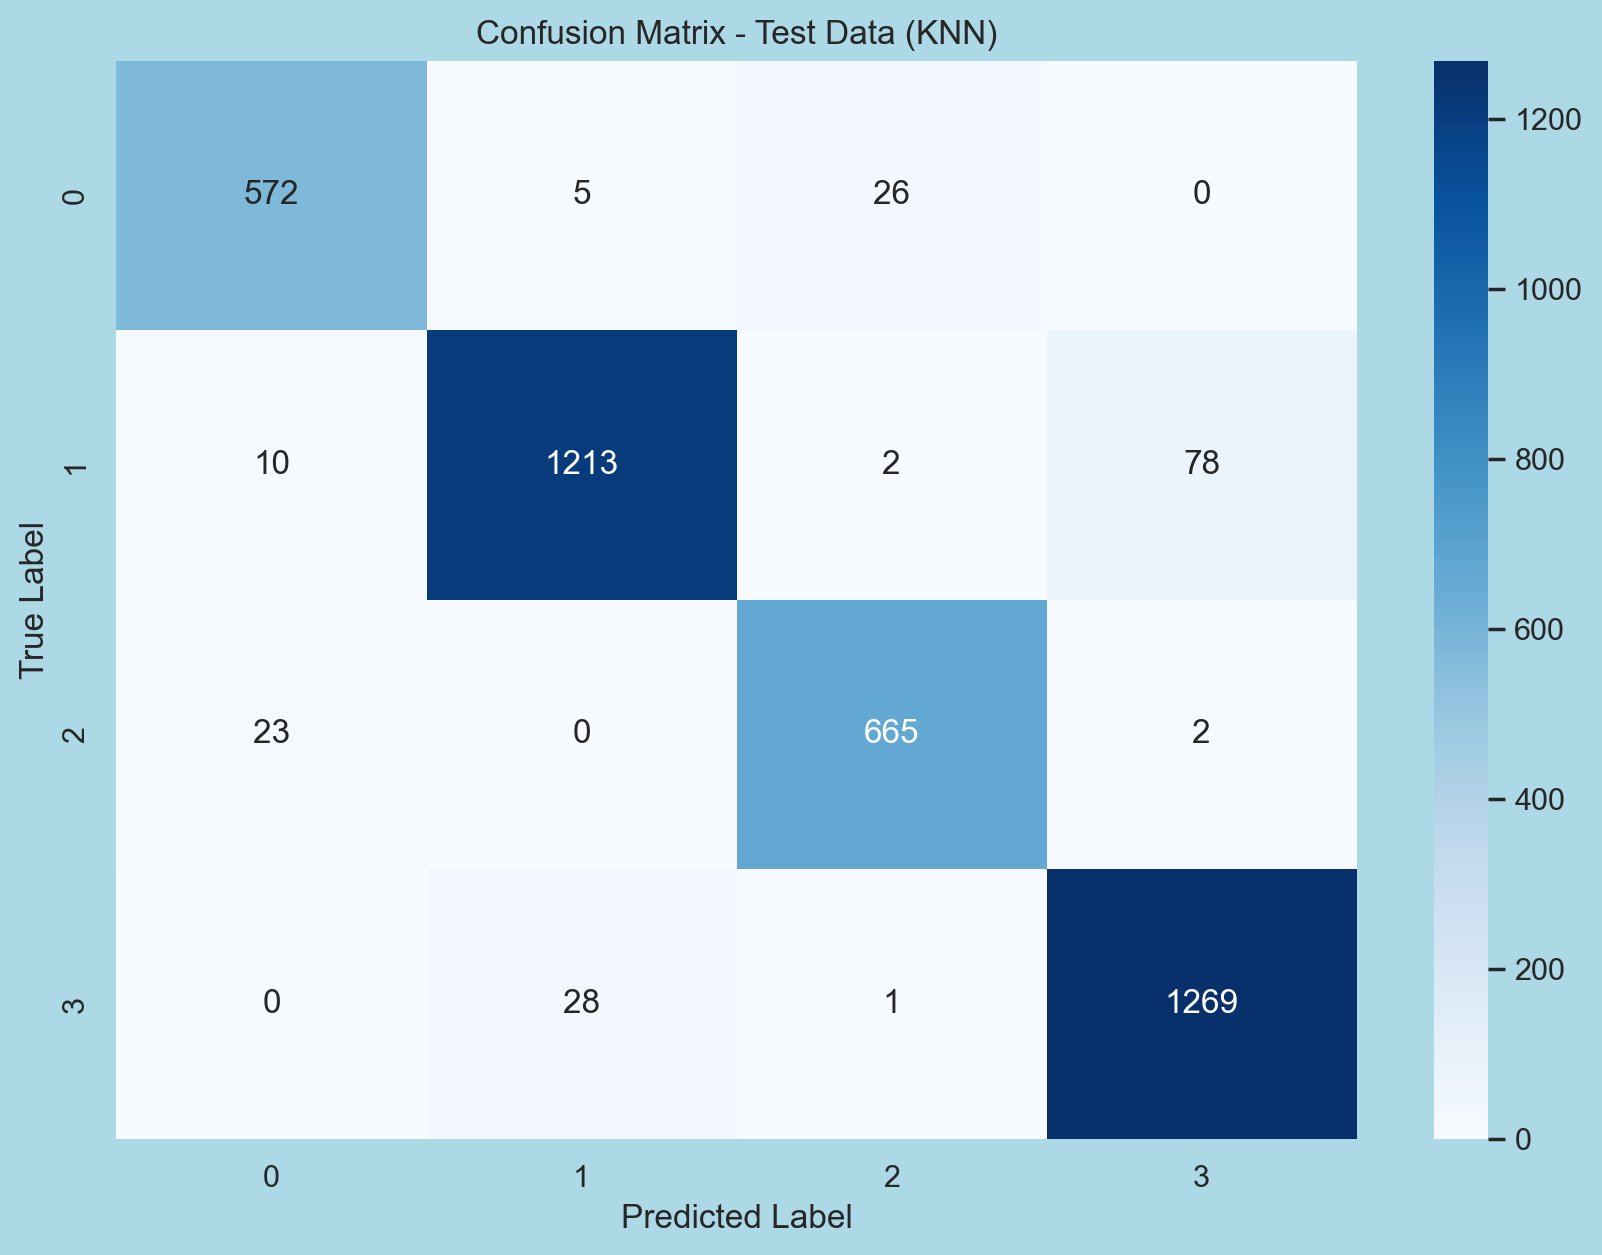

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# KNN Hyperparameters Grid
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],     # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm for computing nearest neighbors
}

# SVM Hyperparameters Grid
svm_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],       # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto']            # Kernel coefficient for 'rbf' and 'poly'
}

# GridSearchCV for KNN
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
knn_grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters for KNN
print("Best Hyperparameters for KNN:", knn_grid_search.best_params_)

# Get the best KNN model
best_knn_model = knn_grid_search.best_estimator_

# Predictions with best KNN model
knn_predictions = best_knn_model.predict(X_test_scaled)

# Evaluation for best KNN model
print("Classification Report for the Best KNN Model:")
print(classification_report(y_test, knn_predictions))

# Confusion Matrix for best KNN model
cm_knn = confusion_matrix(y_test, knn_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Test Data (KNN)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# GridSearchCV for SVM
svm_grid_search = GridSearchCV(SVC(), svm_param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
svm_grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters for SVM
print("Best Hyperparameters for SVM:", svm_grid_search.best_params_)

# Get the best SVM model
best_svm_model = svm_grid_search.best_estimator_

# Predictions with best SVM model
svm_predictions = best_svm_model.predict(X_test_scaled)

# Evaluation for best SVM model
print("Classification Report for the Best SVM Model:")
print(classification_report(y_test, svm_predictions))

# Confusion Matrix for best SVM model
cm_svm = confusion_matrix(y_test, svm_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Test Data (SVM)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [13]:
#Deployment
import joblib
file='HealthRisk'
joblib.dump(ensemble_model,"HealthRisk")
model=joblib.load(open("HealthRisk",'rb'))